In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
data_path = '../../data/postprocessed/PM/'

mapping_table = {
    'backprop': 'Backpropagation algorithm',
    'gaussian': 'Gaussian Elimination',
    'gpu': 'Stream Cluster',
    'lenet': 'Lenet5',
    'gpuburn': 'GPU-burn'
}

data_sheet = pd.DataFrame()
for csv_name in [file for file in os.listdir(data_path) if file.endswith('_telemetry.csv') and not file.startswith('srad')]:
    csv_full_path = os.path.join(data_path, csv_name)
    print(csv_full_path)
    df = pd.read_csv(csv_full_path)
    df['Range'] = int(csv_name.split('_')[1].split('_')[0])
    df['App_name'] = mapping_table[csv_name.split('_')[0]]

    data_sheet=pd.concat([data_sheet, df], ignore_index=True)

../../data/postprocessed/lenet_2_telemetry.csv
../../data/postprocessed/gpuburn_2_telemetry.csv
../../data/postprocessed/gpuburn_3_telemetry.csv
../../data/postprocessed/gaussian_5_telemetry.csv
../../data/postprocessed/lenet_1_telemetry.csv
../../data/postprocessed/backprop_5_telemetry.csv
../../data/postprocessed/lenet_5_telemetry.csv
../../data/postprocessed/gpuburn_4_telemetry.csv
../../data/postprocessed/backprop_2_telemetry.csv
../../data/postprocessed/gaussian_4_telemetry.csv
../../data/postprocessed/lenet_4_telemetry.csv
../../data/postprocessed/backprop_4_telemetry.csv
../../data/postprocessed/gaussian_1_telemetry.csv
../../data/postprocessed/gaussian_2_telemetry.csv
../../data/postprocessed/backprop_3_telemetry.csv
../../data/postprocessed/gaussian_3_telemetry.csv
../../data/postprocessed/gpuburn_1_telemetry.csv
../../data/postprocessed/gpuburn_5_telemetry.csv
../../data/postprocessed/lenet_3_telemetry.csv
../../data/postprocessed/backprop_1_telemetry.csv


### Drop meaningless columns

In [6]:
data_sheet.describe()

,timestamp_ns,gpu_index,temperature_C,util_gpu_percent,util_mem_percent,mem_total_MB,mem_used_MB,mem_free_MB,clock_sm_MHz,clock_mem_MHz,clock_graphics_MHz,fan_speed_percent,power_draw_W,ecc_volatile_corrected,ecc_volatile_uncorrected,ecc_aggregate_corrected,ecc_aggregate_uncorrected,Range
count,4.598000e+03,4598.0,4598.000000,4598.000000,4598.000000,4598.0,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.0,4598.000000,4598.0,4598.0,4598.0,4598.0,4598.000000
mean,4.879273e+12,0.0,44.279034,12.360592,2.996738,8188.0,1292.748804,6895.250761,681.944541,2196.001522,681.944541,-1.0,8.868774,-1.0,-1.0,-1.0,-1.0,2.151370
std,1.189223e+12,0.0,7.032183,30.835985,8.299943,0.0,2444.194015,2444.193849,749.036037,2720.926620,749.036037,0.0,10.529852,0.0,0.0,0.0,0.0,0.722347
min,2.991564e+12,0.0,38.000000,0.000000,0.000000,8188.0,353.000000,255.000000,26.000000,405.000000,26.000000,-1.0,2.334000,-1.0,-1.0,-1.0,-1.0,1.000000
25%,3.786905e+12,0.0,39.000000,0.000000,0.000000,8188.0,353.000000,7711.000000,210.000000,405.000000,210.000000,-1.0,2.567000,-1.0,-1.0,-1.0,-1.0,2.000000
50%,4.769267e+12,0.0,40.000000,0.000000,0.000000,8188.0,353.000000,7835.000000,210.000000,405.000000,210.000000,-1.0,2.692500,-1.0,-1.0,-1.0,-1.0,2.000000
75%,5.920835e+12,0.0,52.000000,3.000000,0.000000,8188.0,477.000000,7835.000000,1185.000000,5500.000000,1185.000000,-1.0,15.863000,-1.0,-1.0,-1.0,-1.0,2.000000
max,7.072389e+12,0.0,64.000000,100.000000,62.000000,8188.0,7933.000000,7835.000000,2040.000000,7000.000000,2040.000000,-1.0,38.283000,-1.0,-1.0,-1.0,-1.0,5.000000


In [16]:
metrics_map = {
    'temperature_C':'Temperature [C]',
    'util_gpu_percent': 'GPU Utilization [%]',
    'util_mem_percent':'GPU Memory Utilization [%]',
    'mem_used_MB':'Used Memory [MB]', 
    'mem_free_MB':'Free Memory [MB]', 
    'clock_sm_MHz':'Streaming Multiprocessor Clock Frequency [MHz]', 
    'clock_mem_MHz':'Memory Clock Frequency [MHz]', 
    'power_draw_W':'GPU Power Consumption [W]'
}
data_sheet.rename(columns=metrics_map, inplace=True)

In [17]:
data_sheet.drop(labels=['ecc_volatile_uncorrected', 'ecc_volatile_uncorrected', 'ecc_aggregate_corrected', 'ecc_aggregate_uncorrected', 'fan_speed_percent'], axis=1, inplace=True)

In [19]:
def plot_gpu_metric(df, column_name):
    df['timestamp_s'] = df['timestamp_ns'] / 1e9
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(data=df, x='timestamp_s', y=column_name, ax=ax, hue='App_name')
    ax.set_title(f'{column_name} over time', fontsize=14)
    ax.set_xlabel('Time (s)', fontsize=12)
    ax.set_ylabel(column_name, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()
    ax.set_xlim(right=5000)
    plt.tight_layout()
    plt.show()

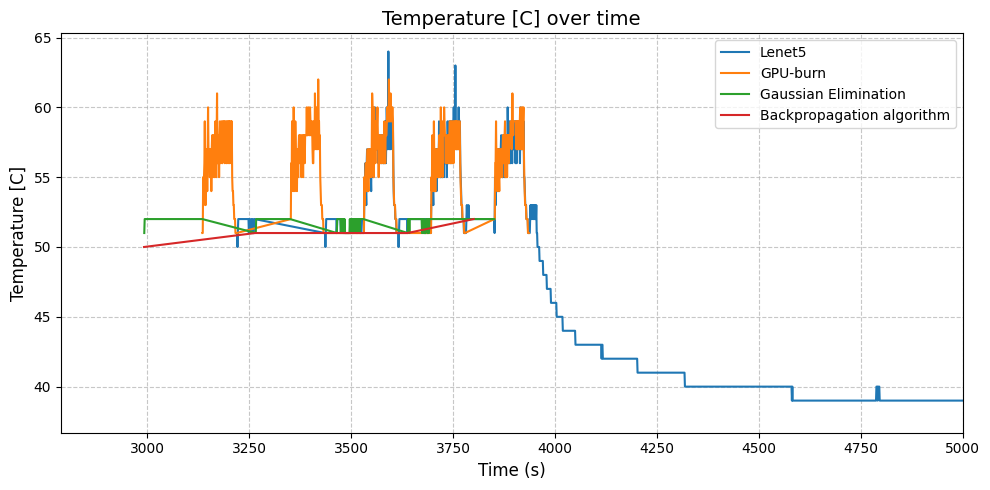

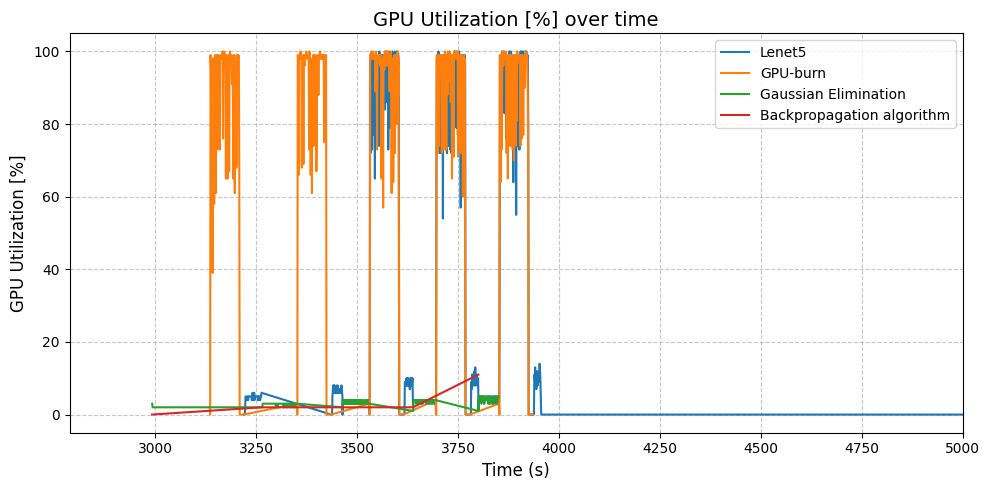

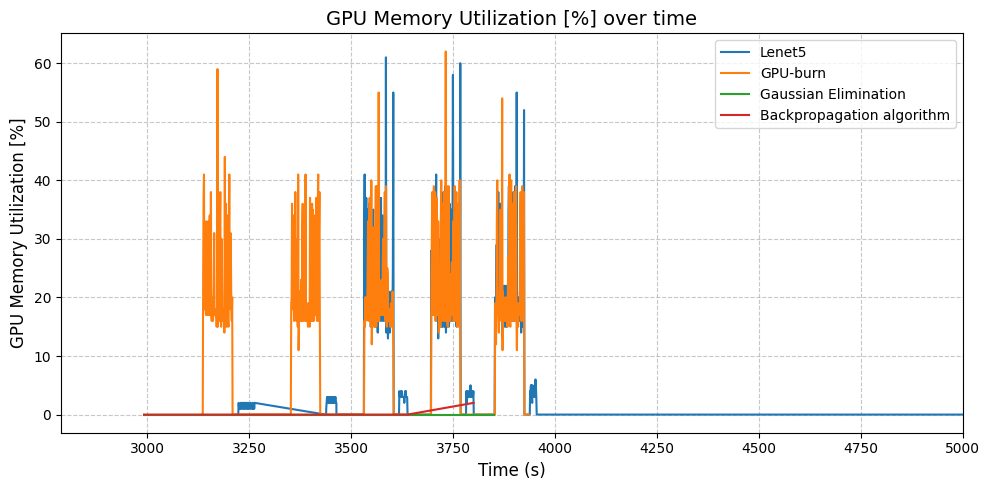

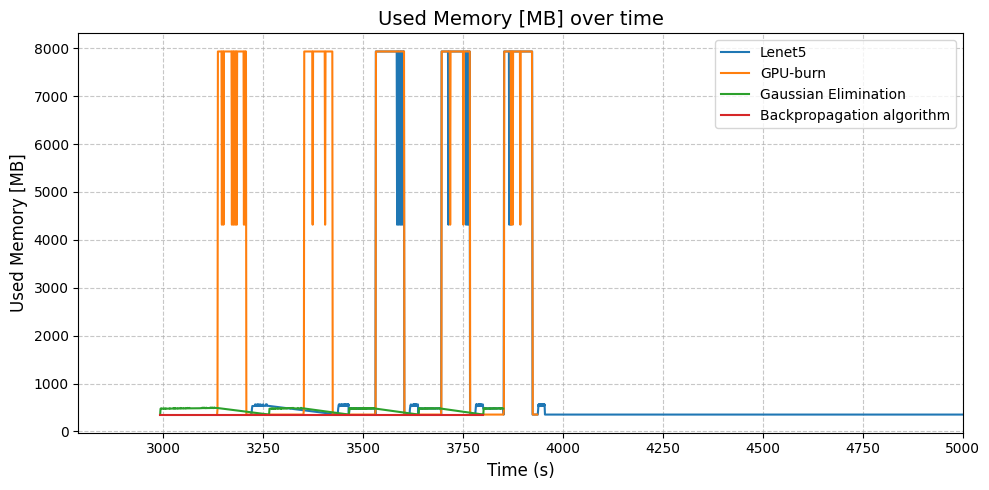

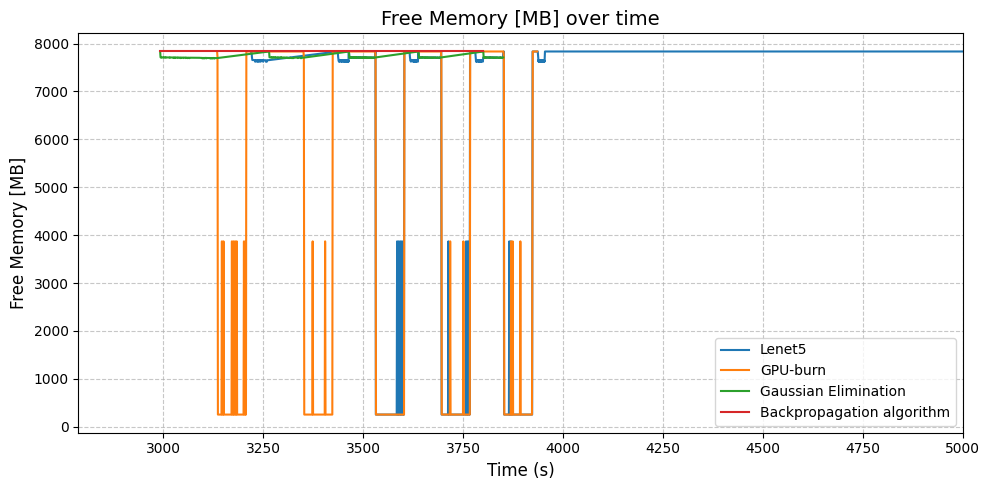

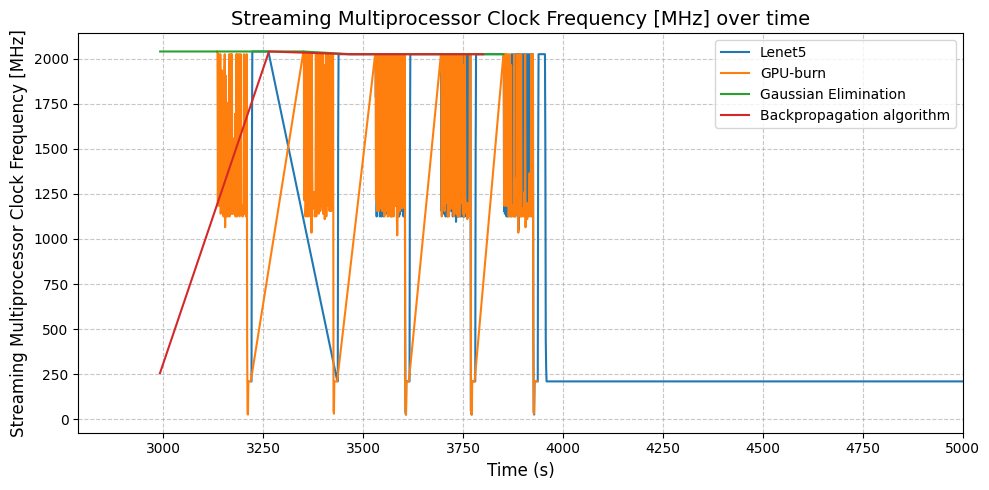

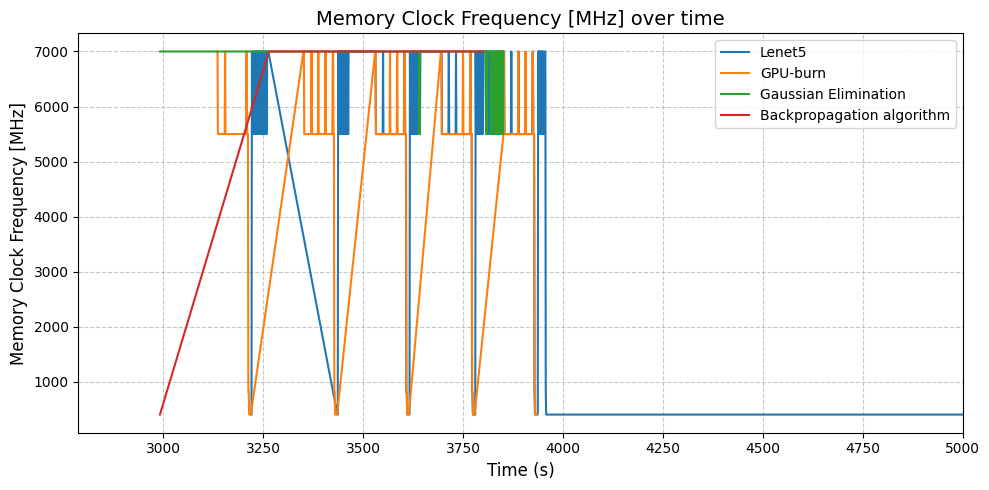

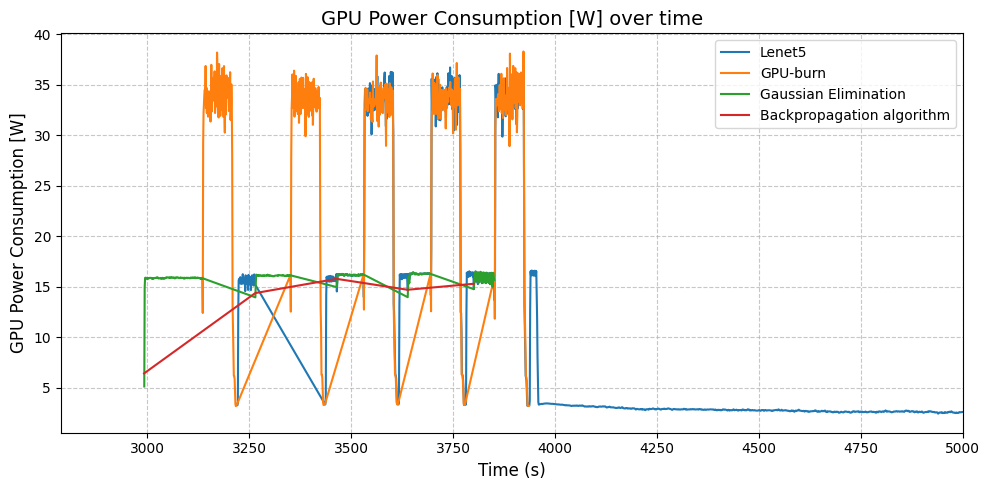

In [20]:
for column in metrics_map.values():
    plot_gpu_metric(data_sheet, column)